# Finding Zeros of Polynomials

This follows somewhat closely to Stoer & Bulirsch (2002) Section 5.5.


Suppose we have a degree $n > 0$ polynomial $p$, with distinct real roots $\xi_1 < \dots < \xi_n$. We notice that outside of $(\xi_1,\xi_n)$, $p$ is convex or concave.
- This is because $p'$ and $p''$ have all real roots inside $(\xi_1,\xi_n)$ (since they must be between the roots of $p$ and $p'$, respectively), so $p'$ and $p''$ cannot change sign. Without loss of generality, assume $\lim_{x\to -\infty} p(x) = -\infty$. Then, if $x < \xi_1$, we know that $p'(x) > 0$. If $p''(x) > 0$, then $\lim_{x\to -\infty} p''(x) > 0$ by nature of polynomials (it cannot converge to zero). Hence, at some point $p'$ must change sign to the left of $x$, which contradicts the assertion that $p'$ has all of its roots to the right of $\xi_1$.

Hence, starting outside of that region, Newton's method will monotonically converge to the outermost root.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

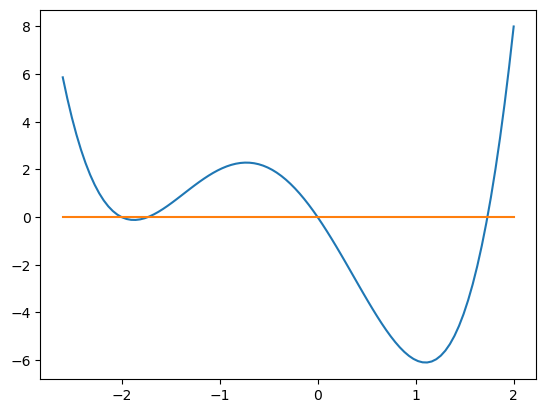

In [18]:
pdeg = 4


def p(x):
    return (x**2 - 3) * (x + 2) * x


def pprime(x):
    return (x**2 - 3) * (x + 2) + (x**2 - 3) * x + (2 * x) * (x + 2) * x


Xview = np.linspace(-2.6, 2, 100)
plt.plot(Xview, p(Xview))
plt.plot([min(Xview), max(Xview)], [0, 0])
plt.show()

## Deflation

Once we found a root $\xi$, we can repeat the process for $q(x) = \frac{p(x)}{(x-\xi)}$. To avoid difficulties of stacking numerical errors on $\xi$, we notice by the quotient rule:
$$q'(x)= \frac{(x-\xi)p'(x) - p(x)}{(x-\xi)^2}$$

$$\frac{q(x)}{q'(x)} = \frac{q(x)(x-\xi)^2}{(x-\xi)p'(x) - p(x)} = \frac{p(x)}{p'(x) - \frac{p(x)}{x-\xi}}$$

For induction, if $p_k(x) = p(x) / \prod_{j=1}^k (x - \xi_j)$ and
$$\frac{p_k(x)}{p_k'(x)} = \frac{p(x)}{p'(x) - \sum_{j=1}^k \frac{p(x)}{x-\xi_j}}$$
then defining $p_{k+1}(x) = p_{k}(x) / (x - \xi_{k+1})$ yields
$$\frac{p_{k+1}(x)}{p_{k+1}'(x)} = \frac{p_k(x)}{p_k'(x) - \frac{p_k(x)}{x-\xi_{k+1}}} = \frac{1}{\frac{p'(x) - \sum_{j=1}^k \frac{p(x)}{x-\xi_j}}{p(x)} - \frac{1}{x-\xi_{k+1}}}= \frac{p(x)}{p'(x) - \sum_{j=1}^{k+1} \frac{p(x)}{x-\xi_j}}$$

Use of L'Hospital's rule can be used when roots are found for the next Newton step:

$$\lim_{x\to \xi_k} \frac{p(x)}{p'(x)- \sum_{j=1}^k \frac{p(x)}{x-\xi_j}} = \lim_{x\to \xi_k} \frac{p(x)(x-\xi_k)}{p'(x)(x - \xi_k) - p(x) - \sum_{j=1}^{k-1} \frac{p(x)(x - \xi_k)}{x-\xi_j}}=\lim_{x\to \xi_k} \frac{p(x) + p'(x)(x-\xi_k)}{p'(x) + p''(x)(x - \xi_k) - p'(x) - \sum_{j=1}^{k-1} \frac{p(x) + p'(x)(x-\xi_k)}{x-\xi_j}} = \frac{2p'(\xi_k)}{p''(\xi_k) - \sum_{j=1}^{k-1} \frac{2p'(\xi_k)}{\xi_k-\xi_j}}$$

In [ ]:
def locate_root(prev_found_roots: list[float], eps: float = 0.2):
    if len(prev_found_roots) > 0:
        x = prev_found_roots[-1]
        # using LH rule, but we need second derivative; just use an approximation for now.
        ppx = pprime(x)
        eval_eps = eps
        pppx = (pprime(x + eval_eps) - pprime(x - eval_eps)) / (2 * eval_eps)
        factor = ppx / (pppx / 2 - sum(ppx / (x - r) for r in prev_found_roots[:-1]))
    else:
        # this value is known to be less than all of the other roots.
        x = -3
        factor = p(x) / pprime(x)

    # take the initial step
    x -= factor
    num_iters = 0

    # just take a couple newton steps to move away from the last root
    while num_iters < 4 or abs(p(x)) > eps:
        px = p(x)
        factor = px / (pprime(x) - sum(px / (x - r) for r in prev_found_roots))
        x -= factor
        num_iters += 1

    return x

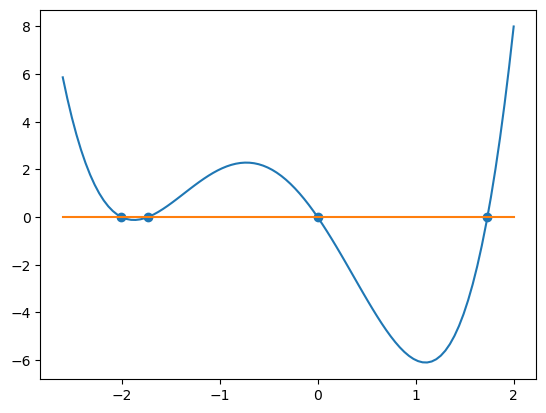

In [44]:
roots = []
while len(roots) < pdeg:
    roots.append(locate_root(roots))


plt.plot(Xview, p(Xview))
plt.plot([min(Xview), max(Xview)], [0, 0])
plt.scatter(roots, p(np.array(roots)))
plt.show()